In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Load the dataset into a pandas DataFrame and display the first five rows.

In [2]:

# Generate sample data for retail sales analysis
np.random.seed(0)

# Number of transactions
n = 1000

# Generate random data
transaction_ids = list(range(1, n + 1))
customer_ids = np.random.choice(range(1001, 2001), n, replace=True)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', periods=n)
product_ids = np.random.choice(range(1, 101), n, replace=True)
product_names = np.random.choice(['Product A', 'Product B', 'Product C'], n)
quantities = np.random.randint(1, 10, n)
unit_prices = np.random.uniform(10, 100, n)
total_prices = quantities * unit_prices

# Create DataFrame
data = {
    'TransactionID': transaction_ids,
    'CustomerID': customer_ids,
    'Date': dates,
    'ProductID': product_ids,
    'ProductName': product_names,
    'Quantity': quantities,
    'UnitPrice': unit_prices,
    'TotalPrice': total_prices
}

df_retail_sales = pd.DataFrame(data)

# Display the first 5 rows
print("Sample of Retail Sales Data:")
print(df_retail_sales.head())

Sample of Retail Sales Data:
   TransactionID  CustomerID                          Date  ProductID  \
0              1        1685 2023-01-01 00:00:00.000000000         21   
1              2        1560 2023-01-01 08:44:41.081081081         44   
2              3        1630 2023-01-01 17:29:22.162162162          1   
3              4        1193 2023-01-02 02:14:03.243243243         67   
4              5        1836 2023-01-02 10:58:44.324324324         98   

  ProductName  Quantity  UnitPrice  TotalPrice  
0   Product B         7  70.943580  496.605062  
1   Product C         4  20.904531   83.618124  
2   Product C         5  26.148967  130.744833  
3   Product A         6  97.309708  583.858250  
4   Product B         9  66.414402  597.729616  


## Calculate the total sales revenue for each day and present findings using a bar chart

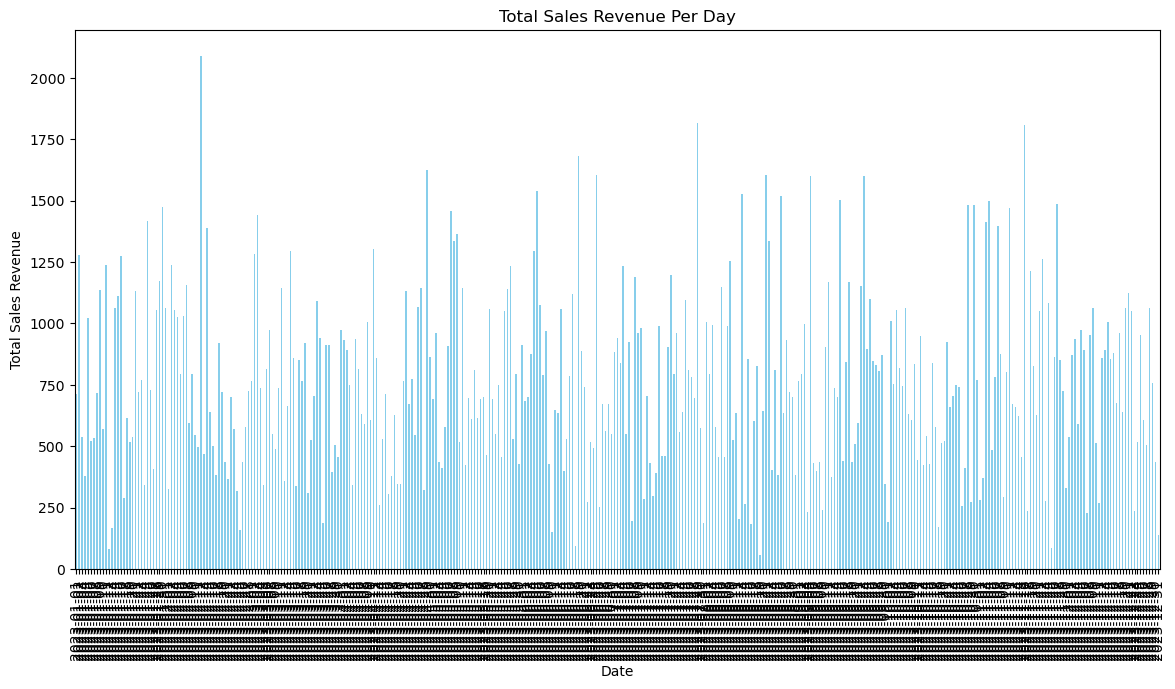

In [3]:
# Calculate total sales revenue for each day
daily_sales = df_retail_sales.groupby(df_retail_sales['Date'].dt.date)['TotalPrice'].sum()

# Plotting the bar chart for daily sales
plt.figure(figsize=(14, 7))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Revenue Per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.show()

## Identify the top five best-selling products in terms of quantity sold and visualize using a pie chart

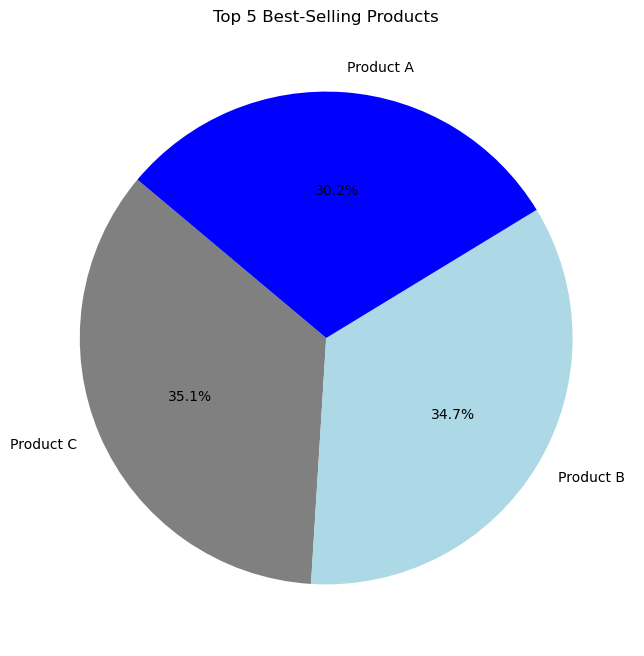

In [14]:
# Calculate total quantity sold for each product
product_quantity = df_retail_sales.groupby('ProductName')['Quantity'].sum()

# Identify the top 5 best-selling products
top_5_products = product_quantity.nlargest(5)

# Plotting the pie chart for top 5 products
plt.figure(figsize=(8, 8))
top_5_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['grey', 'lightblue', 'blue', 'lightblue', 'grey'])
plt.title('Top 5 Best-Selling Products')
plt.ylabel('')
plt.show()

## Calculate the average unit price of products sold and determine if there are any outliers

In [5]:
# Calculate the average unit price
average_unit_price = df_retail_sales['UnitPrice'].mean()
print(f"Average Unit Price: ${average_unit_price:.2f}")

# Determine if there are any outliers in the unit price
unit_price_std = df_retail_sales['UnitPrice'].std()
outliers = df_retail_sales[(df_retail_sales['UnitPrice'] > (average_unit_price + 3 * unit_price_std)) | 
                           (df_retail_sales['UnitPrice'] < (average_unit_price - 3 * unit_price_std))]
print(f"Number of outliers in unit price: {len(outliers)}")

Average Unit Price: $55.22
Number of outliers in unit price: 0


## Perform time series analysis to identify any seasonal trends in sales

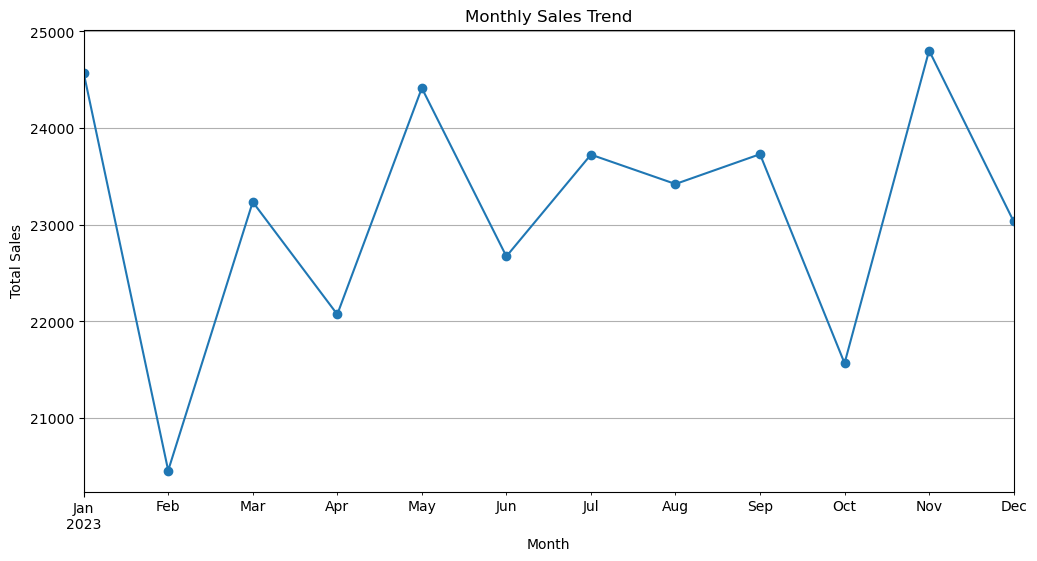

In [6]:
# Resampling sales data by month to see trends
monthly_sales = df_retail_sales.resample('M', on='Date')['TotalPrice'].sum()

# Plotting the time series analysis
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Assess customer buying patterns by analyzing the distribution of transaction sizes (total price per transaction)

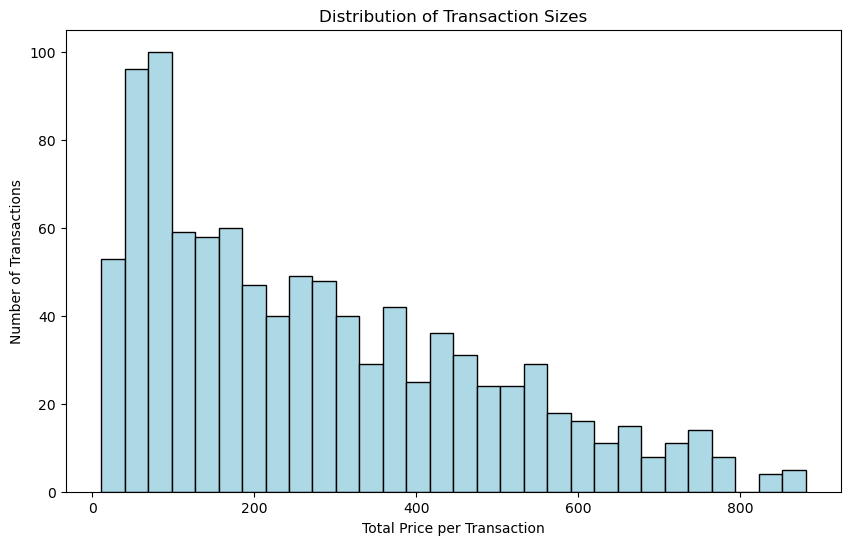

In [15]:
# Plotting the distribution of transaction sizes
plt.figure(figsize=(10, 6))
plt.hist(df_retail_sales['TotalPrice'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Total Price per Transaction')
plt.ylabel('Number of Transactions')
plt.show()

## ----------END  END------------